In [1]:
import pandas as pd
import numpy as np
import pylab as plt


In [2]:
gen_data = pd.read_csv('盈亏比.csv', index_col=0)


In [33]:
target_columns = gen_data.columns[:4].to_list() + ['gold_macd', 'bit_macd', 'gold_ma5', 'gold_ma15',
                                         'bit_ma5', 'bit_ma15', 'gold_rsi_15', 'bit_rsi_5','bit_dea', 'bit_dif', 'gold_pl_rate', 'bit_pl_rate', 'gold_dea', 'gold_dif']
target_data = gen_data[target_columns]


In [40]:
target_data['gold_buy_macd'] = 0
for i in range(1, target_data.shape[0]):
    if target_data['able_trade_gold'][i] == 0:
        if target_data['gold_macd'].loc[i + 2] > 0 and target_data['gold_macd'].loc[i - 1] < 0 and target_data['gold_dea'][i] < 0 and target_data['gold_dif'][i]<0:
            target_data['gold_buy_macd'].loc[i - 1] = 1
            target_data['gold_buy_macd'].loc[i + 2] = 1
        elif target_data['gold_macd'].loc[i+2] < 0 and target_data['gold_macd'].loc[i - 1] > 0:
            target_data['gold_buy_macd'].loc[i - 1] = -1
            target_data['gold_buy_macd'].loc[i + 2] = -1
        i += 2

    else:
        if target_data['gold_macd'].loc[i] > 0 and target_data['gold_macd'].loc[i - 1] < 0 and target_data['gold_dea'][i] < 0 and target_data['gold_dif'][i]<0:
            target_data['gold_buy_macd'].loc[i - 1] = 1
        elif target_data['gold_macd'].loc[i] < 0 and target_data['gold_macd'].loc[i - 1] > 0:
            target_data['gold_buy_macd'].loc[i - 1] = -1


D:\Anaconda\envs\deeplab\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\envs\deeplab\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [8]:
target_data['gold_buy_rsi'] = 0
for i in range(1, target_data.shape[0]):
    if target_data['gold_rsi_15'].iloc[i] > 60:
        target_data['gold_buy_rsi'].iloc[i] = - ( 1 - target_data['gold_rsi_15'].iloc[i] / 100)
    elif target_data['gold_rsi_15'].iloc[i] < 40:
        target_data['gold_buy_rsi'].iloc[i] = 1 - target_data['gold_rsi_15'].iloc[i] / 100
    # target_data['gold_buy_rsi'].iloc[i] = 1 - target_data['gold_rsi_15'].iloc[i] / 100
    # target_data['gold_buy_rsi'].iloc[i] = - ( 1 - target_data['gold_rsi_15'].iloc[i] / 100)

D:\Anaconda\envs\deeplab\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\envs\deeplab\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
D:\Anaconda\envs\deeplab\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [41]:
per_gold = 0.01
target_data['total_property1'] = 0.0
target_data['c_share1'] = 0.0
target_data['c_share1'][0] = 1000
target_data['gold_share'] = 0.0
target_data['gold_growth'] = gen_data['gold_growth']
target_data['gold_profit'] = 0
for i in range(1, target_data.shape[0]):
    target_data['gold_profit'][i] = target_data['gold_profit'][i - 1] + \
        target_data['gold_growth'][i - 1] * target_data['gold_share'][i - 1]
    target_data['gold_share'][i] = target_data['gold_share'][i - 1]
    target_data['c_share1'][i] = target_data['c_share1'][i - 1]
    if i == 488:
        target_data['gold_share'][i] = 0
        target_data['c_share1'][i] = target_data['gold_share'][i - 1] * \
            (1 - per_gold) * target_data['USD (PM)'][i - 1]
    
    if i < 488 or i > 1137:
        if target_data['able_trade_gold'][i]:
            if target_data['gold_buy_macd'][i] == 1 and target_data['c_share1'][i] > 0:
                target_data['gold_share'][i] = target_data['gold_share'][i - 1] + \
                    target_data['c_share1'][i - 1] * (1 - per_gold) / gen_data['USD (PM)'][i - 1]
                # target_data['c_share'][i] = target_data['c_share'][i - 1] - \
                #     target_data['c_share'][i - 1]*target_data['gold_buy_rsi'][i]
                target_data['c_share1'][i] = 0
            if target_data['gold_buy_macd'][i] == -1 and target_data['gold_share'][i] > 0:
                target_data['gold_share'][i] = 0
                target_data['c_share1'][i] = target_data['gold_share'][i - 1] * \
                    (1 - per_gold) * target_data['USD (PM)'][i - 1]

target_data['total_property1'] = target_data['gold_share'] * target_data['USD (PM)'] + target_data['c_share1']


D:\Anaconda\envs\deeplab\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\envs\deeplab\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\envs\deeplab\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

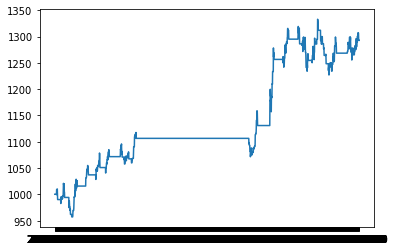

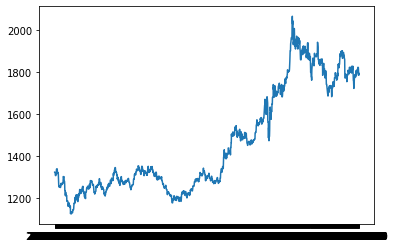

In [30]:
plt.plot(target_data['Date'],target_data['total_property1'])
plt.show()
plt.plot(target_data['Date'], target_data['USD (PM)'])
plt.show()

In [34]:
target_data['bit_buy_macd'] = 0
for i in range(1, target_data.shape[0]):
    if target_data['bit_macd'].loc[i] > 0 and target_data['bit_macd'].loc[i - 1] < 0 and target_data['bit_dea'][i] < 0 and target_data['bit_dif'][i]<0:
        target_data['bit_buy_macd'].loc[i - 1] = 1
    elif target_data['bit_macd'].loc[i] < 0 and target_data['bit_macd'].loc[i - 1] > 0:
        target_data['bit_buy_macd'].loc[i - 1] = -1

D:\Anaconda\envs\deeplab\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\envs\deeplab\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [37]:
per_bit = 0.02
target_data['total_property2'] = 0.0
target_data['c_share2'] = 0.0
target_data['c_share2'][0] = 1000
target_data['bit_share'] = 0.0
target_data['bit_growth'] = gen_data['bit_growth']
target_data['bit_profit'] = 0
for i in range(1, target_data.shape[0]):
    target_data['bit_profit'][i] = target_data['bit_profit'][i - 1] + \
        target_data['bit_growth'][i - 1] * target_data['bit_share'][i - 1]
    target_data['bit_share'][i] = target_data['bit_share'][i - 1]
    target_data['c_share2'][i] = target_data['c_share2'][i - 1]
    
    if target_data['bit_buy_macd'][i] == 1 and target_data['c_share2'][i] > 0:
        target_data['bit_share'][i] = target_data['bit_share'][i - 1] + \
            target_data['c_share2'][i - 1] * (1 - per_bit) / gen_data['Value'][i - 1]
        # target_data['c_share2'][i] = target_data['c_share2'][i - 1] - \
        #     target_data['c_share2'][i - 1]*target_data['gold_buy_rsi'][i]
        target_data['c_share2'][i] = 0
    if target_data['bit_buy_macd'][i] == -1 and target_data['bit_share'][i] > 0:
        target_data['bit_share'][i] = 0
        target_data['c_share2'][i] = target_data['bit_share'][i - 1] * \
            (1 - per_bit) * target_data['Value'][i - 1]

target_data['total_property2'] = target_data['bit_share'] * target_data['Value'] + target_data['c_share2']


D:\Anaconda\envs\deeplab\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\envs\deeplab\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\envs\deeplab\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

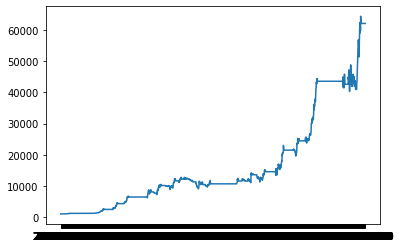

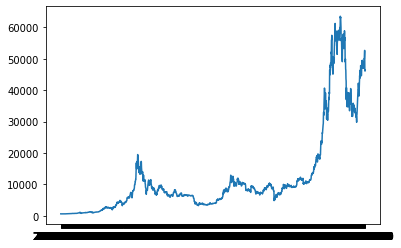

In [38]:
plt.plot(target_data['Date'],target_data['total_property2'])
plt.show()
plt.plot(target_data['Date'], target_data['Value'])
plt.show()

D:\Anaconda\envs\deeplab\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\envs\deeplab\lib\site-packages\pandas\core\series.py:1105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._set_values(indexer, value)
D:\Anaconda\envs\deeplab\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

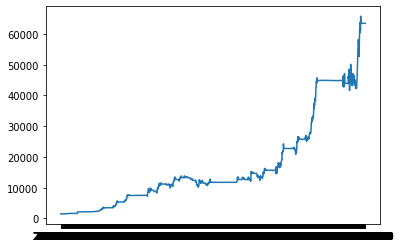

In [43]:
target_data['total_property1'][:100] = target_data['total_property1'][:100] / 2
target_data['total_property'] = target_data['total_property1'] + target_data['total_property2']

plt.plot(target_data['Date'],target_data['total_property'])
plt.show()

In [49]:
assets=[]

for per_gold in np.arange(0.01,0.11,0.01):
    for per_bt in np.arange(0.01,0.21,0.01):
        target_data['total_property1'] = 0.0
        target_data['c_share1'] = 0.0
        target_data['c_share1'][0] = 1000
        target_data['gold_share'] = 0.0
        target_data['gold_growth'] = gen_data['gold_growth']
        target_data['gold_profit'] = 0
        for i in range(1, target_data.shape[0]):
            target_data['gold_profit'][i] = target_data['gold_profit'][i - 1] + \
                target_data['gold_growth'][i - 1] * target_data['gold_share'][i - 1]
            target_data['gold_share'][i] = target_data['gold_share'][i - 1]
            target_data['c_share1'][i] = target_data['c_share1'][i - 1]
            if i == 488:
                target_data['gold_share'][i] = 0
                target_data['c_share1'][i] = target_data['gold_share'][i - 1] * \
                    (1 - per_gold) * target_data['USD (PM)'][i - 1]
            
            if i < 488 or i > 1137:
                if target_data['able_trade_gold'][i]:
                    if target_data['gold_buy_macd'][i] == 1 and target_data['c_share1'][i] > 0:
                        target_data['gold_share'][i] = target_data['gold_share'][i - 1] + \
                            target_data['c_share1'][i - 1] * (1 - per_gold) / gen_data['USD (PM)'][i - 1]
                        # target_data['c_share'][i] = target_data['c_share'][i - 1] - \
                        #     target_data['c_share'][i - 1]*target_data['gold_buy_rsi'][i]
                        target_data['c_share1'][i] = 0
                    if target_data['gold_buy_macd'][i] == -1 and target_data['gold_share'][i] > 0:
                        target_data['gold_share'][i] = 0
                        target_data['c_share1'][i] = target_data['gold_share'][i - 1] * \
                            (1 - per_gold) * target_data['USD (PM)'][i - 1]

        target_data['total_property1'] = target_data['gold_share'] * target_data['USD (PM)'] + target_data['c_share1']

        target_data['total_property2'] = 0.0
        target_data['c_share2'] = 0.0
        target_data['c_share2'][0] = 1000
        target_data['bit_share'] = 0.0
        target_data['bit_growth'] = gen_data['bit_growth']
        target_data['bit_profit'] = 0
        for i in range(1, target_data.shape[0]):
            target_data['bit_profit'][i] = target_data['bit_profit'][i - 1] + \
                target_data['bit_growth'][i - 1] * target_data['bit_share'][i - 1]
            target_data['bit_share'][i] = target_data['bit_share'][i - 1]
            target_data['c_share2'][i] = target_data['c_share2'][i - 1]
            
            if target_data['bit_buy_macd'][i] == 1 and target_data['c_share2'][i] > 0:
                target_data['bit_share'][i] = target_data['bit_share'][i - 1] + \
                    target_data['c_share2'][i - 1] * (1 - per_bit) / gen_data['Value'][i - 1]
                # target_data['c_share2'][i] = target_data['c_share2'][i - 1] - \
                #     target_data['c_share2'][i - 1]*target_data['gold_buy_rsi'][i]
                target_data['c_share2'][i] = 0
            if target_data['bit_buy_macd'][i] == -1 and target_data['bit_share'][i] > 0:
                target_data['bit_share'][i] = 0
                target_data['c_share2'][i] = target_data['bit_share'][i - 1] * \
                    (1 - per_bit) * target_data['Value'][i - 1]

        target_data['total_property2'] = target_data['bit_share'] * target_data['Value'] + target_data['c_share2']
        target_data['total_property1'][:100] = target_data['total_property1'][:100] / 2
        target_data['total_property'] = target_data['total_property1'] + target_data['total_property2']

        assets.append(target_data['total_property'][target_data.shape[0] - 1].copy())

D:\Anaconda\envs\deeplab\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
D:\Anaconda\envs\deeplab\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\envs\deeplab\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

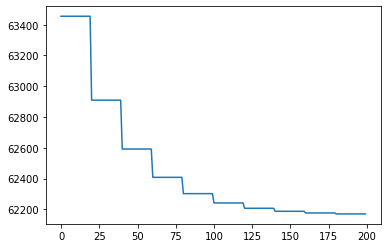

In [50]:
plt.plot(assets)
plt.savefig('不同手续费最大总资产走势图.png')
plt.show()